In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
# setting path
sys.path.append("/content/drive/MyDrive/simclr")
sys.path.append("/content/drive/MyDrive/simclr/layers")
sys.path.append("/content/drive/MyDrive/simclr/models")
sys.path.append("/content/drive/MyDrive/simclr/loss")
sys.path.append("/content/drive/MyDrive/simclr/optim")
sys.path.append("/content/drive/MyDrive/simclr/dataloader")
sys.path.append("/content/drive/MyDrive/simclr/instance-discrim")
sys.path.append("/content/drive/MyDrive/simclr/instance-discrim/dloader")

In [3]:
from simclr import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *
from ResNetCifar import ResNetCifar
from utilsInstance import *
from NCECriterion import *
from alias_multinomial import *
from Cifar10Instance import *
from dloadertest import *

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pickle

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
dataset = Cifar10Instance()
train_loader = DataLoader(dataset,
                    batch_size=128,
                    shuffle=True,
                    drop_last=True,
                    num_workers=2)

Files already downloaded and verified


In [7]:
len_dtrain = 50000
output_dim = 2048
noise_count = 256
temp = 0.07
momentum = 0.9
#lemniscate = NCEAverage(output_dim,len_dtrain,noise_count,temp,momentum)
criterion = NCECriterion(len_dtrain)

In [8]:
batchSize = 128
resnet = ResNetCifar("resnet50",batchSize,momentum,temp,noise_count).cuda()
lr = 0.03
momentum = 0.9
weight_decay = 1e-4
epochs = 100
optimizer = torch.optim.SGD(resnet.parameters(),lr,momentum= momentum,weight_decay= weight_decay)

In [9]:
resnet, avg_loss_epoch, mem = trainInstance(resnet,epochs,train_loader,criterion,optimizer,True,"/content/model256","/content/memo256")

Epoch: 0, step: 50/390, loss: 1385.0802001953125
Epoch: 0, step: 100/390, loss: 1341.030029296875
Epoch: 0, step: 150/390, loss: 1297.125732421875
Epoch: 0, step: 200/390, loss: 1249.9095458984375
Epoch: 0, step: 250/390, loss: 1207.6456298828125
Epoch: 0, step: 300/390, loss: 1158.354736328125
Epoch: 0, step: 350/390, loss: 1114.7176513671875
Epoch: 0 completed, average loss: 1254.9625807542068, time taken: 0.4695361574490865 mins
Epoch: 1, step: 50/390, loss: 1031.0765380859375
Epoch: 1, step: 100/390, loss: 990.514404296875
Epoch: 1, step: 150/390, loss: 947.221923828125
Epoch: 1, step: 200/390, loss: 905.5725708007812
Epoch: 1, step: 250/390, loss: 862.20947265625
Epoch: 1, step: 300/390, loss: 819.7099609375
Epoch: 1, step: 350/390, loss: 772.9466552734375
Epoch: 1 completed, average loss: 908.6869394155649, time taken: 0.4639710505803426 mins
Epoch: 2, step: 50/390, loss: 701.3518676757812
Epoch: 2, step: 100/390, loss: 663.578369140625
Epoch: 2, step: 150/390, loss: 625.39300537

In [11]:
with open("/content/model-k256-log", "wb") as fp:   #Pickling
  pickle.dump(avg_loss_epoch, fp)

In [12]:
test_loader, training_labels = dloaders_test(128)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
K = 5
knn_classifier = build_knn(mem,training_labels,K)
predicted_test_labels, labels = knn_predict(test_loader,knn_classifier,resnet)

In [14]:
get_accuracy(labels,predicted_test_labels)

0.19661458333333334

In [36]:
training_dataset = Cifar10Instance()
training_loader= DataLoader(training_dataset,
                    batch_size=50000,
                    shuffle=False,
                    drop_last=True,
                    num_workers=2)
training_images,training_labels,training_indexs  = next(iter(training_loader))

Files already downloaded and verified


In [37]:
test_imgs, test_labels  = next(iter(test_loader))

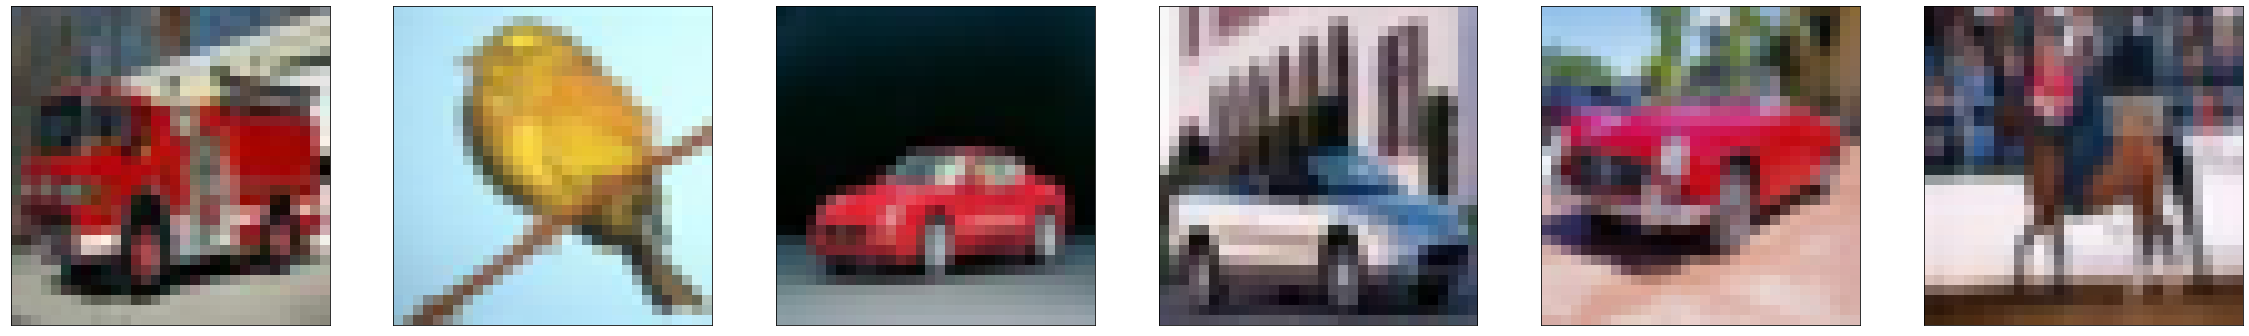

In [40]:
plotNeighbour(resnet,knn_classifier,test_imgs[23],training_images)

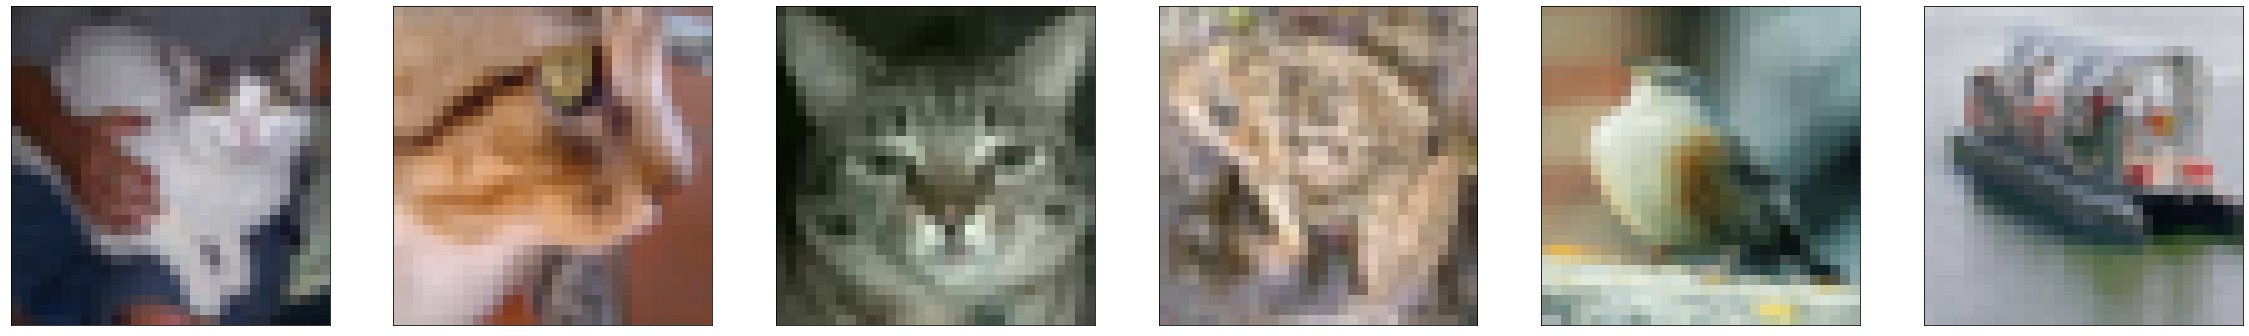

In [45]:
plotNeighbour(resnet,knn_classifier,test_imgs[77],training_images)

In [47]:
K = 3
knn_classifier = build_knn(mem,training_labels,K)
predicted_test_labels, labels = knn_predict(test_loader,knn_classifier,resnet)

In [48]:
get_accuracy(labels,predicted_test_labels)

0.1867988782051282